# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [6]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as pm


def design_matrix(x, m):
    matrix = []
    x_arr = np.array(x)
    for M in range(m+1):
        matrix.append(x_arr**M)
    arr_matrix = np.transpose(np.array(matrix))
    return arr_matrix

def solve(A,b):
    x = np.dot(np.linalg.inv(A.T @ A) @ A.T, b)
    res = np.linalg.norm(A @ x - b)
    return x, res

M = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b = [solve(design_matrix(x,m), y) for m in M]

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [49]:
for B in b:
    print("m = %d," % (len(B[0]) - 1), B[1]/(len(x) - len(B[0]) - 1))

m = 1, 0.6577688620858926
m = 2, 0.5134114629791822
m = 3, 0.038684724271575245
m = 4, 0.04113580090722847
m = 5, 0.044370702750256855
m = 6, 0.04614027487366699
m = 7, 0.05225799621203492
m = 8, 0.05691593825043728
m = 9, 0.06963578062600366
m = 10, 0.08900037832912544


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

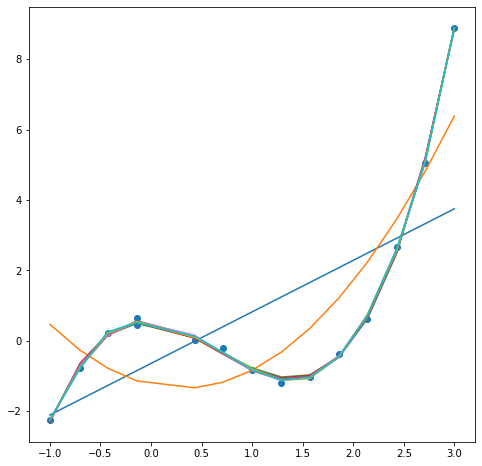

In [41]:
plt.figure(figsize=(8, 8))
plt.scatter(x,y)
for B in b:
    plt.plot(x, pm.polyval(x,B[0]))
plt.show()

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [63]:
def QR(matrix, betta):
    q, r = np.linalg.qr(matrix)
    tq = np.transpose(q)
    return np.linalg.solve(r[:matrix.shape[1]], (tq @ betta)[:matrix.shape[1]])

qr = QR(design_matrix(x,3), y) - b[2][0]
print(qr)

[ 2.77555756e-16  1.73194792e-14  2.22044605e-14 -9.99200722e-15]


# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

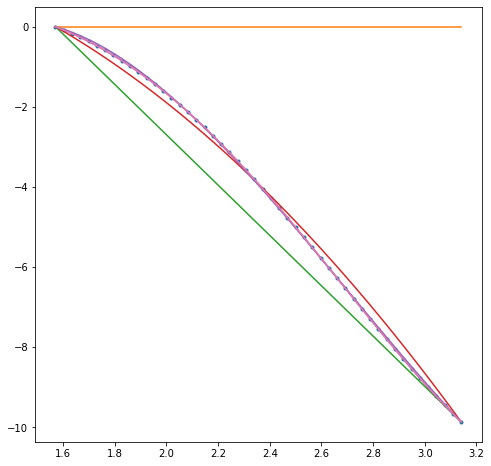

In [108]:
def lagrange_polynom(node, k, x, p):
    n = len(node)
    for i in range(n):
        if i != k:
            p = p * x- p * node[i]
            p = p / (node[k] - node[i])    
    return p

def lagrange_interpolation(node, x, y):
    ly = np.zeros(len(x))
    n = len(node)
    for k in range(n):
        ly = y[k] * lagrange_polynom(node, k, x, 1) + ly 
    return ly

f = lambda x: x * x * np.cos(x)

plt.figure(figsize=(8, 8))
plt.plot(np.linspace(np.pi / 2, np.pi), f(np.linspace(np.pi / 2, np.pi)), ".")

for m in [1, 2, 3, 4, 5, 6]:
    plt.plot(x, lagrange_interpolation(np.linspace(np.pi/2,np.pi, m), x, f(np.linspace(np.pi/2,np.pi, m))))


### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

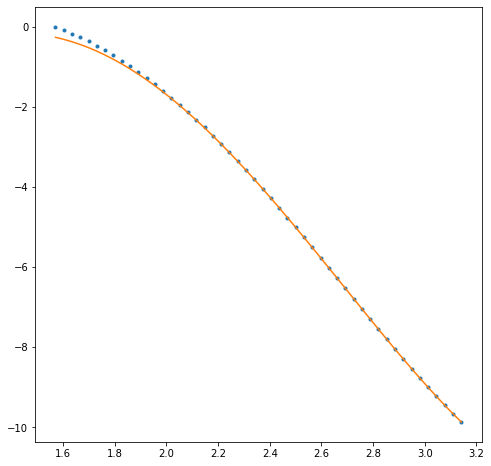

In [116]:
def chebyshev(a, b, m):
    node = []
    
    for i in range(m):
        x = 1 / 2 * ((a + b) - (a - b) * np.cos((2 * i + 1) * np.pi / (2*m)))
        node.append(x)
        
    return np.array(nodes)

node = chebyshev(np.pi / 2, np.pi, 3)

plt.figure(figsize=(8, 8))
plt.plot(x, f(x), ".")
plt.plot(x, lagrange_interpolation(node, x, f(node)))
plt.show()